# Voxel-space and World-space

In the first part of this lesson we are going to be focusing on *spatial transformations*. We will spend more time discussing this form of image processing as spatial methods are relevant to a much wider variety of analysis steps. Spatial transformations are also where more errors will occur, and so warrant more of our attention.

## Data Matrix Indices

We can conceptualise an MRI image as a 3D matrix (like a big cube), where we can refer to any voxel within the cube using an index along each dimension. Typically we refer to these dimensions as $x$, $y$ and $z$, where $x$ corresponds to the *row*, $y$ corresponds to the *column* and $z$ corresponds to the *slice*. An index into an image is therefore a *triplet* of values that indicates how far along each of the dimensions we need to travel in order to find the value we want. 

As an example, the `MATLAB` code below shows the process of loading an image (which you can download from [here](https://livemanchesterac.sharepoint.com/:u:/r/sites/UOM-FBMH-MSc-NCCN/Shared%20Documents/PCHN62141%20Functional%20Neuroanatomy/Learning%20Materials/Asynchronous/Week%204/2.%20Image%20Processing/Data/example_image.nii?csf=1&web=1&e=Haernk&download=1)) and then extracting a value using the voxel coordinates $x = 180$, $y = 180$ and $z = 110$. This tells `MATLAB` that we want to travel $180$ voxels along the $x$ dimension, $180$ voxels along the $y$ dimension, $110$ voxels along the $z$ dimension and then extract the value found at that location.

In [80]:
image = spm_data_read('example_image.nii');
voxel = image(180,180,110)

voxel = 347.0026

Alternatively, we can think of the image more like a stack of cards, where we first extract the matrix at slice $110$

In [83]:
slice = image(:,:,110);

and then find the value at row $180$ and column $180$

In [86]:
slice(180,180)

ans = 347.0026

## Voxel-space

The approach of indexing the data matrix directly can be thought of as representing the image in *voxel-space*. This means that the voxels themselves form the coordinate system. The image dimensions are given in voxels, we index the image using voxel coordinates and the origin of the coordinate system is simply the first voxel saved in the image file. 

Of note is that the orientation of the image is based on the storage-order of the data on disk. This is usually dictated by the scanner and can differ from image to image. As such, there are no guarantees about which direction in the image correspond to which dimensions of the data matrix. For example, if we display a single slice of the example image we loaded above, we get

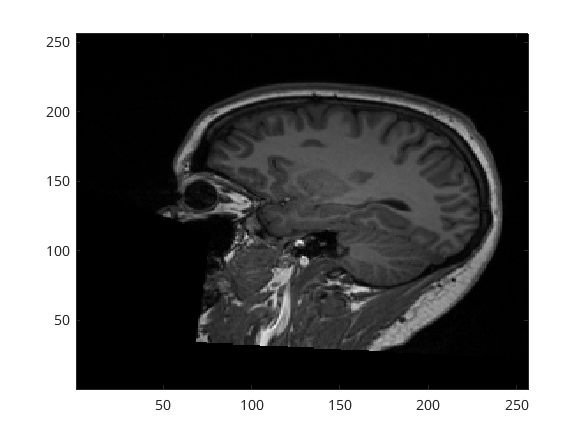

In [89]:
figure;
imagesc(image(:,:,110)'); % transpose image as display convention is x = columns and y = rows
set(gca,'YDir','normal'); % make sure y-axis runs bottom -> top
colormap('gray');

Here we can see that the $x$-axis runs anterior-posterior, the $y$-axis runs inferior-superior and the slices run left-right. This goes against the typical convention in neuroimaging, as we will see below, but is entirely determined by how the scanner chooses to collect and save the data.  

{numref}`voxel-space-fig` given an example of a functional slice at $x = 40$ displayed in voxel-space, where the grid and axes are given in voxel units and the voxel located at $y = 60$ and $z = 20$ has been highlighted.

```{figure} images/voxel-space-func.png
---
width: 800px
name: voxel-space-fig
---
Example of a functional slice displayed in voxel-space.
```

Voxel-space is the most basic coordinate system we can use with an image and is the only way we can index the actual values inside the data matrix. This means that no matter what we do, we always need to get back to voxel-space eventually. However, this does not mean that we have to work in voxel-space exclusively.

## World-space

As mentioned already, one issue with the voxel-space representation is that we have no correspondence between the dimensions of the data matrix and the different physical directions in an image. For instance, the anatomical example from above had the $x$-dimension running *anterior-posterior*, whereas as the functional example has the $x$-dimension running *left-right*. Another issue is that a voxel is not a standard unit of measurement and can be a variety of sizes depending on the scanning sequence. If you say that an image of an object is 100 voxels wide, that information says nothing about how big that object is in the real world. As such, a coordinate systems based on voxels is only useful when our image processing does not need to know about the physical location of the voxels in space. Generally speaking, most filtering operations can be performed in voxel-space, but any spatial transformations need more knowledge about the physical sizes of voxels as well as the physical interpretation of the image dimensions.

In order to get information about the physical location of a voxel in space, we can convert the voxel coordinates to millimetre coordinates. We will cover how this is done later in the lesson, but for now just note that by doing this we effectively transform the coordinate system of the image into a real-world representation. Traditionally, we consider the $x$-dimension to refer to *left-right*, the $y$-dimension to refer to *anterior-posterior* and the $z$-dimension to refer to *inferior-superior*. The origin of these axes corresponds to the coordinates $\left[0, 0, 0\right]$, and is usually placed within the brain at a specific anatomical point. This means the coordinates can be considered millimetre shifts relative to the origin. For instance, a negative $x$ coordinate means the *left* side of the brain and a positive $x$ coordinates means the *right* side of the brain. This is illustrated in {numref}`axis-orientation-fig`.

```{figure} images/axis-orientation.png
---
width: 400px
name: axis-orientation-fig
---
...
```

This alternative world-space coordinate system is shown below. Compared to the voxel-space image, we can see that the scale of the axes has changed to reflect the fact that, in this image, 1 voxel is equivalent to 3mm. In addition, the origin has been placed in its typical location of the anterior commissure, meaning the coordinate system now has a meaningful anatomical interpretation. For example, the coordinates shown below can be interpreted as 60mm posterior and 30mm superior to the anterior commissure.